# Correlation matrices and hierarchical clustering

Example using 5 years of S&P 500 data, found here: https://www.kaggle.com/datasets/camnugent/sandp500

Inspired by https://gmarti.gitlab.io/qfin/2020/07/28/sampling-from-empirical-copulas.html

First load the table listing stock values for 500 companies over five years:

In [1]:
import pandas as pd

df = pd.read_csv('sp500/all_stocks_5yr.csv',parse_dates=['date'])

# sort by Name, and within each, sort by date
df = df.sort_values(['Name', 'date'], ascending=[True, True])

df = df.fillna(method='ffill') #ffill is forward fill:  "propagate last valid observation forward to next valid"

df

,date,open,high,low,close,volume,Name
71611,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
71612,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
71613,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
71614,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
71615,2013-02-14,44.72,44.78,44.36,44.58,3826245,A
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


Text(0, 0.5, 'close')

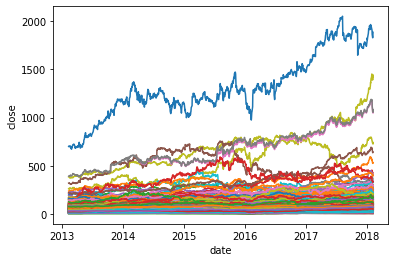

In [2]:
import matplotlib.pyplot as plt

plt.figure()
for companyName,companyData in df.groupby(df['Name']):
    plt.plot( companyData['date'] , companyData['close'] )
plt.xlabel('date')
plt.ylabel('close')

## Reshaping the data

Our table contains over half a million row (each one of the 500 companies has 1259 rows). 

We can reshape it into a table with 1259 rows and 500 columns.

In [3]:
df_pivoted = df.pivot(index='date', columns='Name', values='close')
df_pivoted

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


Pandas has a built-in function that we can use to compute the daily change, in percent:

In [4]:
daily_change = df_pivoted.pct_change()

And now we can take a look at correlations betwen those daily changes:

In [5]:
correlations = daily_change.corr()

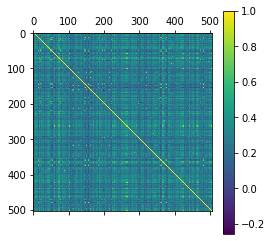

In [6]:
plt.matshow( correlations )
plt.colorbar()

<AxesSubplot:xlabel='Name', ylabel='Name'>

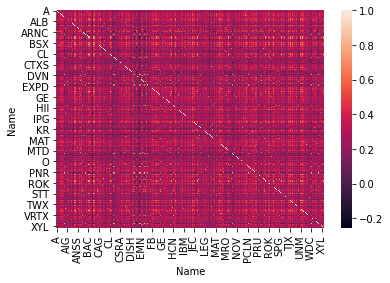

In [7]:
# alternatively:
import seaborn as sns
sns.heatmap( correlations )

The majority are positively correlated: the general trend from 2013 to 2018 has been positive for most companies.

The diagonal only contains ones (the correlation of every variable with itself).

## Group companies by similarity with hierarchical clustering

inspired from https://wil.yegelwel.com/cluster-correlation-matrix/

In this example we impose a maximum distance between points within a cluster. the `fcluster` function also takes a `maxclust` argument if we wanted to impose a number of clusters instead.

In [11]:
import scipy.cluster.hierarchy as sch
import numpy as np

pairwise_distances = sch.distance.pdist(correlations)
linkage = sch.linkage(pairwise_distances, method='complete')
cluster_distance_threshold = pairwise_distances.max()/2
idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                    criterion='distance')
idx = np.argsort(idx_to_cluster_array)
sorted_correlations = correlations.iloc[idx, :].T.iloc[idx, :]

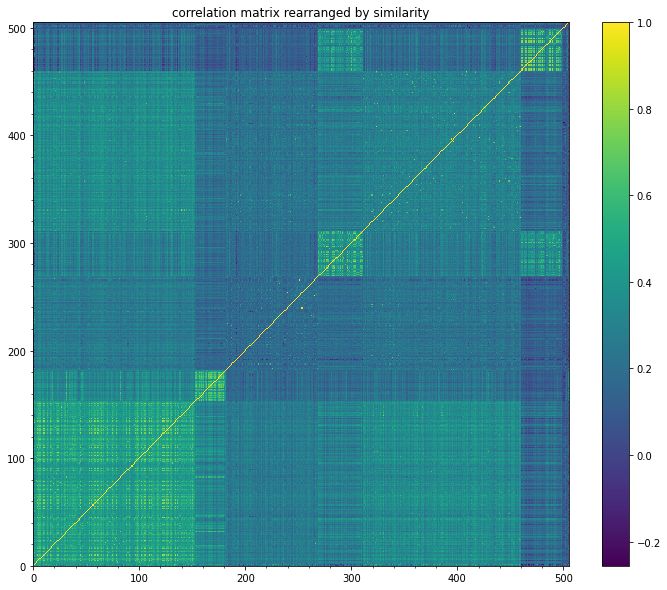

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(111)
plt.title('correlation matrix rearranged by similarity')
plt.pcolormesh( sorted_correlations )
plt.colorbar()
plt.minorticks_on()

We can now see structure in the correlation matrix. We haven't changed any of the numbers, just rearranged the order of columns and rows!

Plot the first 150, then 150 to 190, to see that within a group, the values tend to all go up on the same day or all go down on the same day.

In [13]:
names_cluster_A = list( sorted_correlations.index[:150] )
names_cluster_B = list( sorted_correlations.index[150:190] )

(-0.15, 0.15)

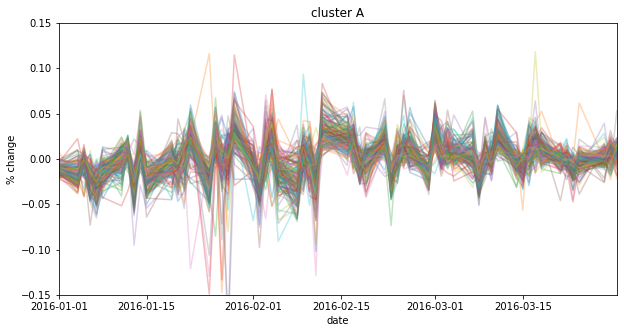

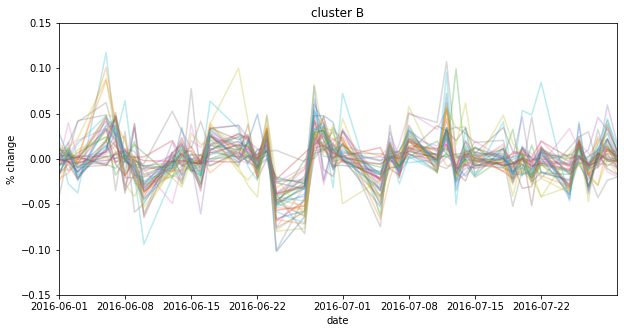

In [14]:
import datetime 

plt.figure(figsize=(10,5))
for companyName,companyData in df.groupby(df['Name']):
    if companyName in names_cluster_A:
        plt.plot( companyData['date'] , companyData['close'].pct_change() , alpha=0.3 )
plt.xlabel('date')
plt.ylabel('% change')
plt.title('cluster A')
plt.xlim([datetime.date(2016, 1, 1), datetime.date(2016, 3, 30)])
plt.ylim(-0.15,0.15)


plt.figure(figsize=(10,5))
for companyName,companyData in df.groupby(df['Name']):
    if companyName in names_cluster_B:
        plt.plot( companyData['date'] , companyData['close'].pct_change() , alpha=0.3 )
plt.xlabel('date')
plt.ylabel('% change')
plt.title('cluster B')
plt.xlim([datetime.date(2016, 6, 1), datetime.date(2016, 7, 30)])
plt.ylim(-0.15,0.15)

We can also see anticorrelations, for instance here we visualise how companies 450 to 500 tend to have variations in the opposite direction compared to group 180 to 260. Note that in the correlation matrix, the strongest anticorrelations are about -0.2.

(-0.1, 0.1)

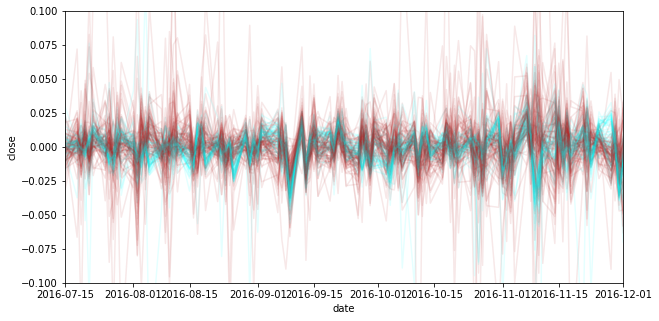

In [19]:
names_cluster_C = list( sorted_correlations.index[450:500] )
names_cluster_D = list( sorted_correlations.index[180:260] )


plt.figure(figsize=(10,5))
for companyName,companyData in df.groupby(df['Name']):
    if companyName in names_cluster_C:
        plt.plot( companyData['date'] , companyData['close'].pct_change() , c='cyan' , label='cluster 3',alpha=0.1)
    elif companyName in names_cluster_D:
        plt.plot( companyData['date'] , companyData['close'].pct_change() , c='firebrick' , label='cluster 4',alpha=0.1)
plt.xlabel('date')
plt.ylabel('close')
plt.xlim([datetime.date(2016, 7, 15), datetime.date(2016, 12, 1)])
plt.ylim(-0.1,0.1)

## Assign companies to clusters

We have rearranged the correlation matrix by assigning each company to a cluster, then reorder the rows/columns. 

If we do that again on the `sorted_correlations` matrix we get the following list:

In [59]:
pairwise_distances = sch.distance.pdist(sorted_correlations)
linkage = sch.linkage(pairwise_distances, method='complete')

cluster_distance_threshold = pairwise_distances.max()/2
idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                    criterion='distance')

In [17]:
idx_to_cluster_array #note that this is sorted already

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

The parameter `p` of `sch.dendrogram` sets the depth to be displayed (how many sub-levels on the vertical axis). 

The parameter `color_threshold` says that points closer than this distance will be painted the same color. If we use the same value as we used in `sch.fcluster` above (which we obtained as `pairwise_distances.max()/2`) we get once again 8 different clusters:

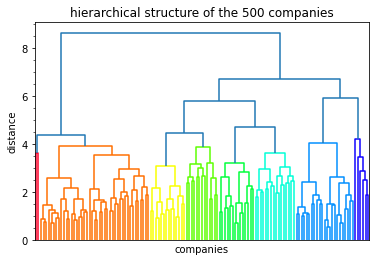

In [64]:
import matplotlib as mpl
from matplotlib.pyplot import cm
cmap = cm.gist_rainbow(np.linspace(0, 1, 10))
sch.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

ddd = sch.dendrogram( linkage , p=7 , truncate_mode='level', color_threshold=cluster_distance_threshold,
              no_labels=True )
plt.title('hierarchical structure of the 500 companies')
plt.ylabel('distance')
plt.xlabel('companies')
plt.minorticks_on()

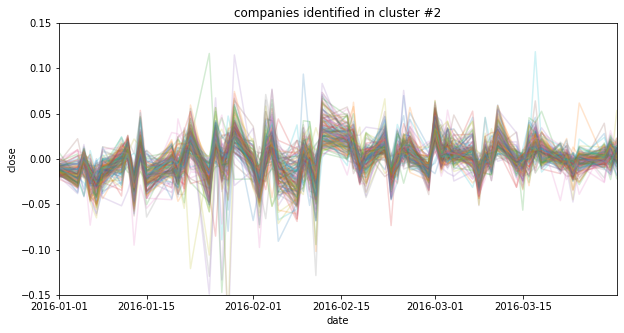

In [165]:
plt.figure(figsize=(10,5))
for companyName,companyData in df.groupby(df['Name']):
    if companyName in sorted_correlations.index[ idx_to_cluster_array==2 ]:
        plt.plot( companyData['date'] , companyData['close'].pct_change() , alpha=0.2)
plt.xlabel('date')
plt.ylabel('close')
plt.xlim([datetime.date(2016, 1, 1), datetime.date(2016, 3, 30)])
plt.ylim(-0.15,0.15)
plt.title('companies identified in cluster #2');